# 24.08.29 통계 학습 17회차: 시계열 데이터의 통계적 분석

### 💡`시계열 데이터의 통계적 분석(Statistical Analysis of Time Series Data)` 요약

1. 해당 분석은 시간에 따른 데이터 변동을 이해하고 미래를 예측하는 과정을 포함한다.

2. 주요 단계로는 데이터의 추세, 계절성, 불규칙성을 파악하는 전처리, 자기상관을 분석해 모델을 선택하는 시계열 모델링, 그리고 예측 성능을 평가하는 작업이 있다.

3. 일반적으로 ARIMA, GARCH 등 다양한 모델이 사용되며, 각 모델의 적합성을 평가하여 최적의 예측을 수행한다.

### 🔎목차

1. 시계열 데이터의 개요

    - 시계열 데이터 정의
    - 시계열 데이터의 특징
    - 시계열 분석의 필요성 및 응용 분야

2. 시계열 데이터의 전처리

    - 데이터 정리 및 결측치 처리
    - 계절성, 추세, 순환성의 탐지 및 제거 방법
    - 시계열 데이터의 정상성 검사

3. 시계열 데이터의 분해

    - 가법적 모델과 승법적 모델
    - 트렌드, 계절성, 불규칙성의 분해
    - Moving Average와 Exponential Smoothing

4. 자기상관과 부분자기상관

    - 자기상관함수(ACF)
    - 부분자기상관함수(PACF)
    - 자기상관의 의미와 분석 방법

5. 시계열 모델링

    - AR(자기회귀) 모델⭐
    - MA(이동평균) 모델
    - ARMA, ARIMA 모델
    - SARIMA 모델 (계절성 ARIMA)
    - 모델 진단, 평가 및 선택 (AIC, BIC 등)⭐

6. 시계열 예측

    - 단기 예측과 장기 예측
    - 예측 오차 측정 지표 (MSE, MAE, MAPE 등)
    - 모델 성능 비교, 선택 및 최적화

7. 변동성 분석

    - GARCH(Generalized Autoregressive Conditional Heteroskedasticity) 모델
    - ARCH 모델과 그 변형
    - 금융 시계열에서의 변동성 예측

8. 고급 시계열 분석

    - 다변량 시계열 분석 (VAR, VECM)
    - 비선형 시계열 모델
    - 상태공간 모델과 칼만 필터
    - 주기성 및 비주기성 시계열 데이터의 분석

9. 시계열 이상 탐지

    - 이상치 정의 및 탐지 방법
    - 이상치 처리 및 안정성 향상 방법

### 1. 시계열 데이터의 개요

1) 시계열 데이터 정의

    - 시계열 데이터(Time Series Data)는 시간에 따라 수집된 데이터이다.
    
    - 이 데이터는 일정한 시간 간격으로 측정된 관측치들의 연속된 집합이다.
    
    - 예를 들어, 하루마다 기록된 기온 데이터나 매 시간 기록된 주식 가격이 시계열 데이터의 예이다.

2) 시계열 데이터의 특징

    - 시간 의존성: 데이터 포인트 간의 상관관계가 시간에 따라 변할 수 있다.

    - 추세(Trend): 데이터가 장기적으로 증가하거나 감소하는 경향을 말한다. (예를 들어, 연간 판매량이 지속적으로 증가하는 경우)

    - 계절성(Seasonality): 일정 주기마다 패턴이 반복되는 현상이다. (예를 들어, 여름철에 에어컨 판매량이 증가하는 현상)

    - 순환성(Cyclicity): 계절성보다는 더 길고 불규칙한 주기로 나타나는 변동이다.

    - 불규칙성(Irregularity): 예측할 수 없는 비정상적인 변동이다.

3) 시계열 분석의 필요성 및 응용 분야

    - 시계열 분석은 금융, 경제, 기상학, 재고 관리 등 다양한 분야에서 사용된다.
    
    - 이를 통해 과거 데이터를 바탕으로 미래를 `예측`하고, 변동 패턴을 분석하여 의사 결정을 지원합니다.

### 2. 시계열 데이터의 전처리

1) 데이터 정리 및 결측치 처리

    - 결측치(missing values)는 시계열 데이터에서 흔히 발생하며, 이를 처리하는 방법은 여러 가지가 있다.
    
        - 삭제: 결측치가 있는 행을 삭제.
        
        - 대체: 평균, 중앙값, 또는 이전 값으로 대체.

In [2]:
# 결측치를 데이터의 평균으로 대체하는 간단한 예시이다.
import numpy as np

# 시계열 데이터에 결측치가 있는 경우
data = np.array([1.2, 2.3, np.nan, 4.5, 5.6])

# 결측치를 평균값으로 대체
data = np.where(np.isnan(data), np.nanmean(data), data)

print(data)

[1.2 2.3 3.4 4.5 5.6]


2) 계절성, 추세, 순환성의 탐지 및 제거 방법

    - 계절성(Seasonality) 제거: 계절성은 특정 계절에 따라 반복되는 패턴을 말한다.
    
        - 이를 제거하려면 계절 차분(Seasonal Differencing)이나 Decomposition 기법을 사용한다.

    - 추세(Trend) 탐지 및 제거: 추세는 데이터의 장기적인 증가나 감소 경향이다.

        - 이를 제거하려면 Moving Average(이동 평균)나 차분(Differencing) 방법을 사용한다.

    - 순환성: 경제적 또는 시장의 상황에 따라 발생하는 패턴을 말한다.

        - 계절성, 추세, 순환성을 탐지하기 위해 시계열 분해 기법을 사용한다.

3) 시계열 데이터의 정상성 검사

    - 정상성(Stationarity)은 데이터의 통계적 성질이 시간에 따라 `변하지 않는 상태`를 의미한다.
    
    - 정상성을 검사하기 위해 ADF(Autoregressive Distributed Lag) 검정을 사용할 수 있다.
    
    - 비정상적인 시계열은 차분(Differencing) 등을 통해 정상화할 수 있다.

### 3. 시계열 데이터의 분해

1) 가법적 모델과 승법적 모델

    - 가법적 모델(Additive Model): 데이터가 트렌드, 계절성, 불규칙성의 합으로 표현된다.

        - $Y_t = T_t + S_t + I_t$

    - 승법적 모델(Multiplicative Model): 데이터가 트렌드, 계절성, 불규칙성의 곱으로 표현된다.

        - $Y_t = T_t \times S_t \times I_t $

2) 트렌드, 계절성, 불규칙성의 분해

    - 시계열 데이터를 각각의 구성 요소로 분해하여 분석할 수 있다.

    - 일반적으로 Moving Average와 Exponential Smoothing 기법을 사용한다.
    
    - Python의 statsmodels 라이브러리를 사용하여 쉽게 수행할 수 있다.

3) 이동 평균(Moving Average)과 지수 평활법(Exponential Smoothing)

    - Moving Average: 일정 기간 동안의 데이터 평균을 구하여 데이터의 평활화를 수행한다. (=노이즈를 줄인다.)

    - Exponential Smoothing: 과거 데이터에 가중치를 두어 예측하는 방법으로, 최근 데이터에 더 큰 비중을 둔다.

In [4]:
# 간단한 이동 평균을 계산하는 예제이다.
import numpy as np

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
moving_avg = np.convolve(data, np.ones(3)/3, mode='valid')

print(moving_avg)

[2. 3. 4. 5. 6. 7. 8. 9.]


### 4. 자기상관과 부분자기상관

1) 자기상관함수(ACF)

    - 자기상관은 시계열 데이터에서 시간 간의 상관 관계를 나타낸다.

    - 𝑘 시차에서의 자기상관계수는 다음과 같이 계산된다.

    - 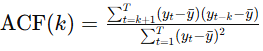

2) 부분자기상관함수(PACF)

    - 부분자기상관은 특정 시차에서의 상관 관계를 다른 시차의 영향을 배제한 상태에서 측정한다.
    
    - 이는 ACF를 확장한 개념이다.

3) 자기상관의 의미와 분석 방법

    - 자기상관함수는 시계열 데이터가 자기 자신과 어떻게 관련되어 있는지를 파악하는 데 사용된다.
    
    - 자기상관이 높다면, 그 데이터는 자기회귀 모형에서 유의미한 요소로 고려될 수 있다.

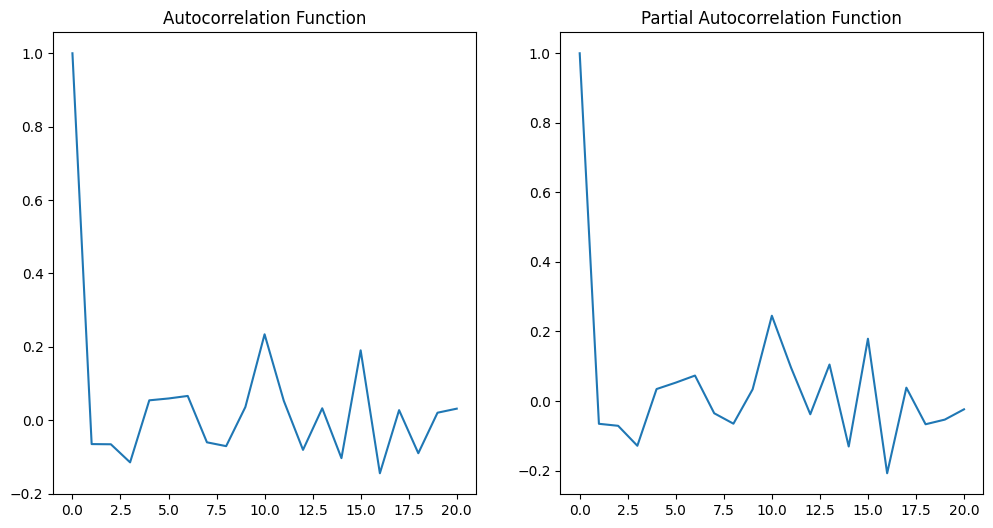

In [5]:
# ACF와 PACF를 계산하고 시각화하는 간단한 예제이다.
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

data = np.random.normal(size=100)
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(lag_acf)
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation Function')
plt.show()

### 5. 시계열 모델링

1) AR(자기회귀) 모델

    - AR 모델은 이전 데이터에 기반하여 현재 값을 예측하는 모델이다.

    - $Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p} + \epsilon_t$


2) MA(이동평균) 모델

    - MA 모델은 과거의 오차를 사용하여 현재 값을 예측한다.

    - $Y_t = \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q} + \epsilon_t$


3) ARMA, ARIMA 모델

    - ARMA 모델은 AR과 MA 모델을 결합한 모델이며, ARIMA는 차분을 통해 비정상성을 제거한 ARMA 모델이다.

4) SARIMA 모델 (계절성 ARIMA)

    - 계절성을 고려한 ARIMA 모델로, 계절 차분을 추가하여 모델링한다.

    - $yt = ARIMA(p,d,q)(P,D,Q,s)$

5) 모델 진단, 평가 및 선택

    - 모델의 진단은 잔차 분석을 통해 수행되며, 평가 지표로는 AIC, BIC 등을 사용하여 최적의 모델을 선택한다.

        - AIC (Akaike Information Criterion)
            
            - 모델의 적합도와 복잡도를 평가하는 기준이다.
            
            - 값이 낮을수록 더 좋은 모델로 평가된다.

        - BIC (Bayesian Information Criterion)
        
            - AIC와 비슷하지만, 모델의 복잡도를 더 강하게 벌점화한다.
            
            - 이 역시 값이 낮을수록 좋은 모델을 의미한다.

### ⭐추가: 자기회귀모델(AR)에서 AR1과 AR2의 개념과 차이점은?

1. AR1 (자기회귀 1차 모형)

    - 개념: 현재 시점의 값이 바로 이전 시점의 값에만 의존한다.

    - 수식: $Y_t = \phi_1 Y_{t-1} + \epsilon_t$

        - $\phi_1$ : 이전 값에 대한 계수
        
        - $\epsilon_t$ : 백색 잡음

    - 특징: 간단하며, 한 시점의 데이터만 사용하여 예측한다. → AR2보다 과적함의 위험이 낮다.

2. AR2 (자기회귀 2차 모형)

    - 개념: 현재 시점의 값이 이전 두 시점의 값에 의존한다.

    - 수식: $Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t$

    - 여기서 $\phi_1$과 $\phi_2$는 각각의 이전 값에 대한 계수이다.

    - 특징: 두 시점의 데이터를 사용하여 예측하므로 → 더 복잡한 구조이며, 더 많은 정보를 활용하여 예측의 정확성을 높인다.

3. 차이점 요약

    - 정보의 양: AR1은 한 시점의 데이터만 사용하는 반면, AR2는 두 시점의 데이터를 사용한다.

    - 복잡성: AR2는 AR1보다 더 복잡하며, 더 많은 파라미터를 추정해야 한다.

    - 예측 성능: AR2는 데이터의 패턴을 더 잘 반영할 수 있지만, 과적합의 위험이 있다.

### ⭐추가: AIC(아카이케 정보 기준)와 BIC(베이시안 정보 기준)의 개념과 차이점은?

1. AIC (Akaike Information Criterion, 아카이케 정보 기준)

    - 개념: 모델의 적합도와 복잡성을 고려하여 평가한다. 적합도가 높으면서도 파라미터 수가 적은 모형을 선호한다.

    - 수식: $AIC = 2k - 2\ln(L)$
    
        - $k$ : 모형의 파라미터 수
        
        - $L$ : 최대 우도

    - 용도: 모형 간 비교 시, AIC 값이 낮을수록 더 좋은 모형으로 간주합니다.

2. BIC (Bayesian Information Criterion, 베이시안 정보 기준)

    - 개념: AIC와 유사하지만, 모형의 복잡성에 더 큰 `패널티`를 부여한다. Bayesian 접근에 기반하여 계산된다.

    - 수식: $BIC = \ln(n)k - 2\ln(L)$
    
        - $n$ : 데이터 포인트 수

    - 용도: BIC 값도 낮을수록 더 좋은 모형으로 간주하며, AIC보다 더욱 보수적인 선택을 제공한다.

3. 공통점

    - 두 개념은 시계열 데이터 분석에서 최적의 모델 선택을 위한 기준이다.

4. 차이점

    - 패널티
        
        - AIC는 파라미터 수에 대해 선형적으로 패널티를 부여하는 반면,
        
        - BIC는 데이터 포인트 수에 로그를 취한 값을 곱하여 더 큰 패널티를 부여한다.

    - 모형 선택 경향
    
        - AIC는 과적합을 허용하는 경향이 있고, BIC는 더 간단한 모형을 선호한다.

5. 요약

    - AIC와 BIC는 모두 모델 선택 기준이지만,
    
    - AIC는 적합도와 파라미터 수를 고려하고, BIC는 데이터 수에 따라 더 큰 패널티를 부여하여 더 간단한 모형을 선호한다.

### 6. 시계열 예측

1) 단기 예측과 장기 예측

    - 단기 예측은 가까운 미래의 값을 예측하는 데 집중하고, 장기 예측은 보다 멀리 떨어진 미래의 추세를 예측한다.

    - 예를 들어, 단기 예측은 보통 몇 주 또는 몇 달 내의 예측을 의미하며, 장기 예측은 몇 년 단위의 예측을 포함한다.

2) 예측 오차 측정 지표

    - MSE(Mean Squared Error): 평균 제곱 오차.

    - MAE(Mean Absolute Error): 평균 절대 오차.

    - MAPE(Mean Absolute Percentage Error): 평균 절대 백분율 오차.

3) 모델 성능 비교, 선택 및 최적화

    - 여러 모델의 예측 성능을 비교하여 가장 적합한 모델을 선택한다.
    
    - 성능 최적화를 위해서는 파라미터 튜닝이나 교차 검증 방법을 사용할 수 있다.

### 7. 변동성 분석

1) GARCH(Generalized Autoregressive Conditional Heteroskedasticity) 모델

    - GARCH 모델은 시계열 데이터의 변동성을 모델링하는 데 사용된다.
    
    - GARCH(1,1) 모델은 다음과 같이 표현된다. 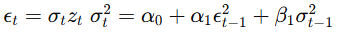

2) ARCH 모델과 그 변형

    - ARCH(Autoregressive Conditional Heteroskedasticity) 모델은 과거 오차의 제곱에 기반하여 현재의 변동성을 예측한다.

    - GARCH는 ARCH 모델의 확장으로, 더 복잡한 변동성 패턴을 설명할 수 있다.

3) 금융 시계열에서의 변동성 예측

    - 금융 시계열에서는 변동성은 가격 변동을 이해하는 데 중요한 역할을 한다.
    
    - 이를 예측하기 위해 GARCH 모델을 자주 사용하며, 변동성 예측은 리스크 관리 및 포트폴리오 최적화에 활용된다.

### 8. 고급 시계열 분석

1) 다변량 시계열 분석 (VAR, VECM)

    - VAR(Vector AutoRegression, 벡터 자기회귀) 모델
        
        - 여러 시계열 변수 간의 관계를 모델링합니다.
        
        - 즉, 여러 시계열 데이터를 동시에 분석하여 상호 영향 관계를 파악한다.

    - VECM(Vector Error Correction Model, 벡터 오차 수정 모델)
    
        - 비정상 시계열의 공적분 관계를 분석하는 데 사용된다.

        - 이는 비정상 시계열의 장기적 균형 관계를 설명한다.

2) 비선형 시계열 모델

    - 선형 모형으로 설명되지 않는 복잡한 패턴을 설명하는 데 사용된다.
    
        - 예를 들어, Threshold Autoregressive(TAR) 모델이 있다.

        - 예를 들어, 변화하는 계절성을 고려하는 모델이 있다.

3) 상태공간 모델과 칼만 필터

    - 상태공간 모델
    
        - 관측치와 (관측되지 않은) 숨겨진 상태 변수 간의 관계를 정의하는 모델로, 시계열 데이터를 표현할 수 있다.

    - 칼만 필터
    
        - 상태공간 모델을 기반으로 최적의 상태 추정을 수행하는 알고리즘이다.

4) 주기성 및 비주기성 시계열 데이터의 분석

    - 주기성 데이터는 정기적인 패턴이 있는 반면, 비주기성 데이터는 불규칙한 패턴을 가진다.

    - - 주기성이 있는 데이터와 없는 데이터를 구분하고, 각각에 적합한 분석 방법을 적용해야 한다.

### 9. 시계열 이상 탐지

1) 이상치 정의 및 탐지 방법

    - 이상치는 일반적인 데이터 패턴에서 벗어나는 데이터 포인트이다.
    
    - 이를 탐지하기 위해 IQR(Interquartile Range), Z-Score 등의 방법을 사용할 수 있다.

2) 이상치 처리 및 안정성 향상 방법

    - 이상치를 제거하거나 대체하여 데이터의 신뢰성을 높이는 방법이 필요하다.